In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [9]:
df= pd.read_csv('CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [13]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [37]:
df.shape

(205, 26)

##Outlier detection and Removal

<Axes: xlabel='price'>

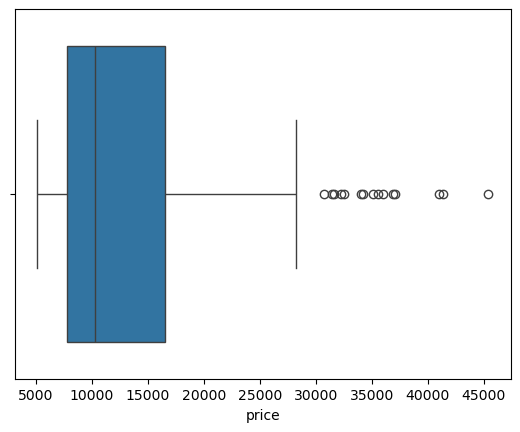

In [137]:
sns.boxplot(x=df['price'])

In [ ]:
##IQR method

In [129]:
q1= df.price.quantile(0.25)
q3= df.price.quantile(0.75)
IQR= q3-q1
q1,q3,IQR

(7788.0, 16503.0, 8715.0)

In [131]:
##finding outliers
df.loc[(df.price >= upper_limit) | (df.price <= lower_limit)]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
16,17,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
73,74,0,buick century special,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0
74,75,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0


<Axes: xlabel='price'>

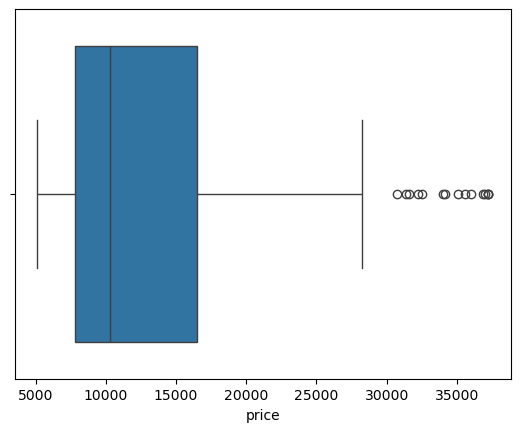

In [135]:
iqr_df= df.copy()
iqr_df['price'] = iqr_df['price'].astype(float)
iqr_df.loc[iqr_df.price > upper_limit, 'price'] = upper_limit
iqr_df.loc[iqr_df.price < lower_limit, 'price'] = lower_limit
sns.boxplot(x= iqr_df.price)

In [19]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [139]:
df_encoding= iqr_df.copy()

In [141]:
label_encoder= LabelEncoder()
df_encoding["Fuel Type"]= label_encoder.fit_transform(df['fueltype'])
df_encoding["Cylinder Number"]= label_encoder.fit_transform(df['cylindernumber'])
df_encoding["Car Body"]= label_encoder.fit_transform(df['carbody'])
df_encoding["Door Number"]= label_encoder.fit_transform(df['doornumber'])


In [143]:
df_encoding["Car Name"]= label_encoder.fit_transform(df['CarName'])
df_encoding["Aspiration"]= label_encoder.fit_transform(df['aspiration'])
df_encoding["Drive Wheel"]= label_encoder.fit_transform(df['drivewheel'])
df_encoding["Fuel System"]= label_encoder.fit_transform(df['fuelsystem'])
df_encoding["Engine Location"]= label_encoder.fit_transform(df['enginelocation'])
df_encoding["Engine Type"]= label_encoder.fit_transform(df['enginetype'])
df_encoding["Cylinder Number"]= label_encoder.fit_transform(df['cylindernumber'])
df_encoding

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,Fuel Type,Cylinder Number,Car Body,Door Number,Car Name,Aspiration,Drive Wheel,Fuel System,Engine Location,Engine Type
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,1,2,0,1,2,0,2,5,0,0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,1,2,0,1,3,0,2,5,0,0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,1,3,2,1,1,0,2,5,0,5
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,1,2,3,0,4,0,1,5,0,3
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,1,1,3,0,5,0,0,5,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,1,2,3,0,139,0,2,5,0,3
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,1,2,3,0,138,1,2,5,0,3
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,1,3,3,0,140,0,2,5,0,5
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,0,3,3,0,142,1,2,3,0,3


In [145]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [147]:
df_encod= df_encoding.drop(["CarName", "carbody", "fueltype", "aspiration", "doornumber", "drivewheel",
                            "enginelocation", "enginetype", "cylindernumber", "fuelsystem"], axis=1)
df_encod

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,Fuel Type,Cylinder Number,Car Body,Door Number,Car Name,Aspiration,Drive Wheel,Fuel System,Engine Location,Engine Type
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,1,2,0,1,2,0,2,5,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,1,2,0,1,3,0,2,5,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,1,3,2,1,1,0,2,5,0,5
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,1,2,3,0,4,0,1,5,0,3
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,1,1,3,0,5,0,0,5,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,1,2,3,0,139,0,2,5,0,3
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,1,2,3,0,138,1,2,5,0,3
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,1,3,3,0,140,0,2,5,0,5
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,0,3,3,0,142,1,2,3,0,3


In [149]:
y=df_encod['price']
X= df_encod.drop('price', axis=1)
X

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,Fuel Type,Cylinder Number,Car Body,Door Number,Car Name,Aspiration,Drive Wheel,Fuel System,Engine Location,Engine Type
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,1,2,0,1,2,0,2,5,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,1,2,0,1,3,0,2,5,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,1,3,2,1,1,0,2,5,0,5
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,1,2,3,0,4,0,1,5,0,3
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,1,1,3,0,5,0,0,5,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,1,2,3,0,139,0,2,5,0,3
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,1,2,3,0,138,1,2,5,0,3
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,1,3,3,0,140,0,2,5,0,5
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,0,3,3,0,142,1,2,3,0,3


In [ ]:
##variance threshold

In [153]:
from sklearn.feature_selection import VarianceThreshold
var_threshold= VarianceThreshold(threshold=0.1)
X_var= var_threshold.fit_transform(X)
var_selected= X.columns[var_threshold.get_support()].tolist()
print("1.Filter method results:" )
print("\n a.Features selected= ", len(var_selected))
print("Selected features", var_selected[:5], "...")

1.Filter method results:

 a.Features selected=  21
Selected features ['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth'] ...


#SCALING

In [155]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [157]:
#Create scalers
standard_scaler = StandardScaler()
minmax_scaler=MinMaxScaler()

##applying different scaling method

In [159]:
X_standardized = standard_scaler.fit_transform(X)
X_normalized = minmax_scaler.fit_transform(X)

In [161]:
#convert to DataFrames for better visualization
X_standardized= pd.DataFrame(X_standardized,columns=X.columns)
X_normalized= pd.DataFrame(X_normalized,columns=X.columns)

In [165]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [169]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [175]:
y_pred= model.predict(X_test)

In [177]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

In [181]:
print("mae", mae)
print("mse", mse)
print("rmse", rmse)
print("r2", r2)

mae 1919.8714593358036
mse 9353152.382174972
rmse 3058.292396448543
r2 0.8647257256309513


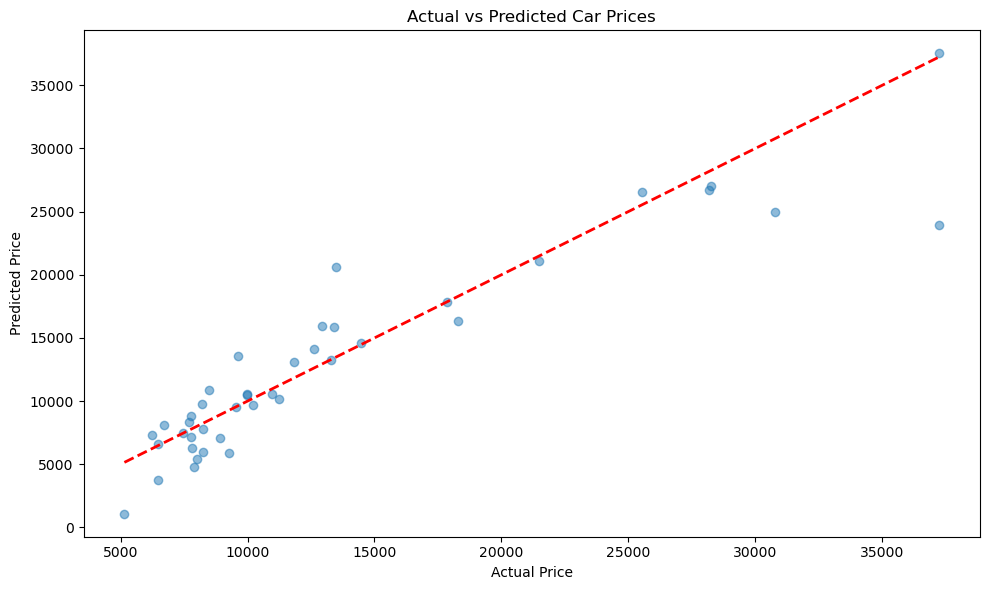

In [183]:
# Visualize actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices')
plt.tight_layout()
plt.show()

In [185]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR

In [187]:
model1= DecisionTreeRegressor()
model1.fit(X_train, y_train)

DecisionTreeRegressor()

In [191]:
y_pred1= model1.predict(X_test)
y_pred1

array([36880.        , 16503.        ,  8949.        , 12170.        ,
       31600.        ,  5195.        ,  7126.        ,  8358.        ,
        8949.        ,  7995.        , 12170.        ,  8058.        ,
       11845.        , 11248.        , 37243.26756596,  6338.        ,
        5399.        , 12764.        ,  6989.        ,  8949.        ,
       11245.        , 13499.        ,  5195.        ,  5348.        ,
        7609.        , 36880.        ,  8449.        , 16515.        ,
        7499.        , 15985.        , 31600.        ,  6669.        ,
        6785.        , 18920.        ,  7957.        , 31600.        ,
        9279.        , 11845.        ,  6575.        , 14869.        ,
        9233.        ])

In [193]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred1)
mse = mean_squared_error(y_test, y_pred1)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred1)

In [195]:
print("mae", mae)
print("mse", mse)
print("rmse", rmse)
print("r2", r2)

mae 1619.6813308771013
mse 5293998.256252887
rmse 2300.8690219681966
r2 0.9234331118147476


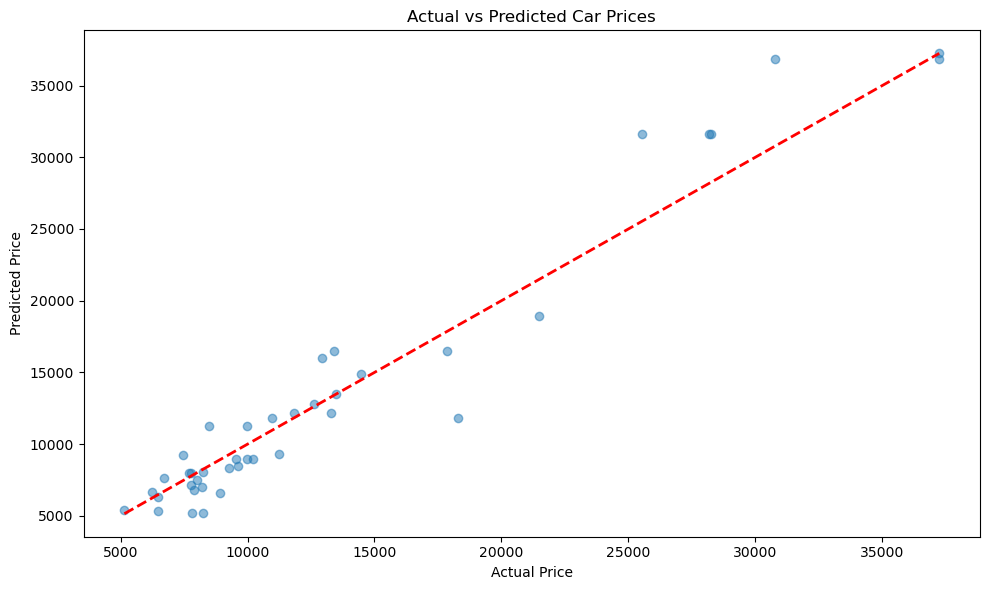

In [197]:
# Visualize actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred1, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices')
plt.tight_layout()
plt.show()

In [ ]:
##Random Forest Regressor

In [199]:
model2= RandomForestRegressor()
model2.fit(X_train, y_train)

RandomForestRegressor()

In [201]:
y_pred2= model2.predict(X_test)

In [203]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred2)
mse = mean_squared_error(y_test, y_pred2)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred2)
print("mae", mae)
print("mse", mse)
print("rmse", rmse)
print("r2", r2)

mae 1200.1261245253138
mse 2656319.643362386
rmse 1629.8219667688818
r2 0.9615817536627648


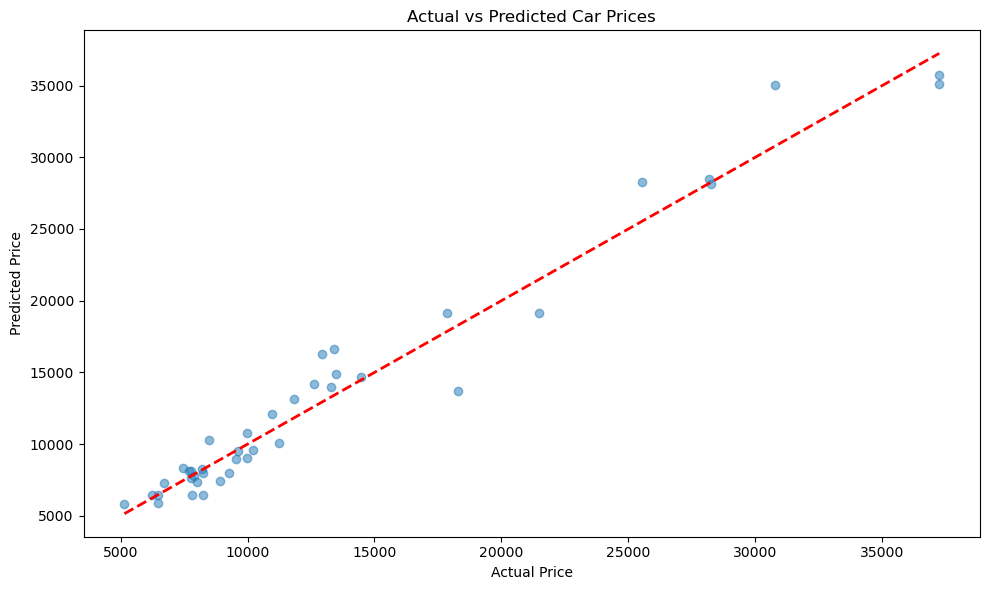

In [205]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred2, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices')
plt.tight_layout()
plt.show()

In [ ]:
##Gradient Boosting Regressor

In [233]:
model3= GradientBoostingRegressor()
model3.fit(X_train, y_train)

GradientBoostingRegressor()

In [237]:
y_pred3= model3.predict(X_test)

In [239]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred3)
mse = mean_squared_error(y_test, y_pred3)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred3)
print("mae", mae)
print("mse", mse)
print("rmse", rmse)
print("r2", r2)

mae 1397.5705193033748
mse 4306216.822937408
rmse 2075.142603036574
r2 0.9377193557640735


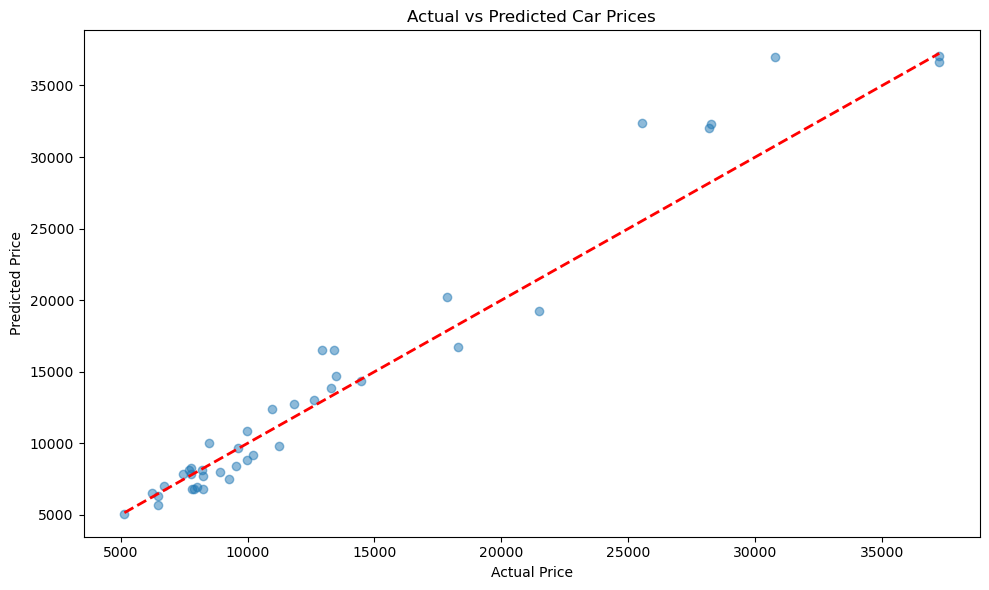

In [241]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred3, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices')
plt.tight_layout()
plt.show()

In [ ]:
##SVR

In [243]:
model4= SVR()
model4.fit(X_train, y_train)

SVR()

In [245]:
y_pred4= model4.predict(X_test)

In [249]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred4)
mse = mean_squared_error(y_test, y_pred4)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred4)
print("mae", mae)
print("mse", mse)
print("rmse", rmse)
print("r2", r2)

mae 5517.078208366775
mse 76148440.07522124
rmse 8726.307356220112
r2 -0.1013318883953831


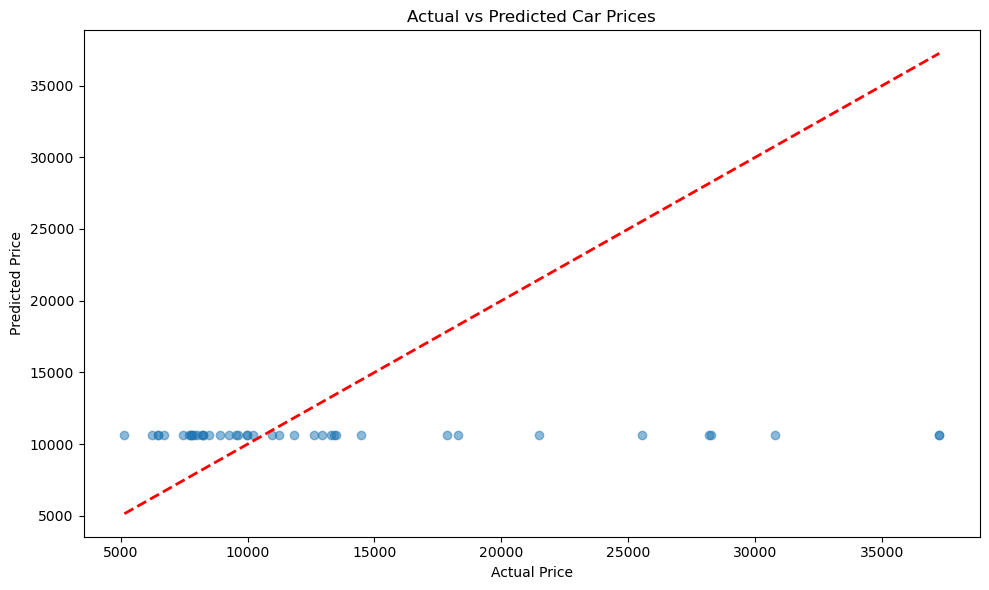

In [223]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred3, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices')
plt.tight_layout()
plt.show()

##Concise explanation

DecisionTreeRegressor (R² = 0.92):

The model explains 92% of the variance in the data.
It captures patterns effectively but might overfit the training data, as Decision Trees often do.
Random Forest Regressor (R² = 0.96):

The best performer, explaining 96% of the variance.
Benefits from ensemble learning, reducing overfitting compared to Decision Trees while maintaining high accuracy.
Gradient Boosting Regressor (R² = 0.93):

Explains 93% of the variance, slightly better than DecisionTreeRegressor but less than Random Forest.
Focuses on reducing errors iteratively, making it robust for slightly complex data patterns.
SVM (R² = -0.101):

Performs poorly, with a negative R² indicating the model fails to fit the data and performs worse than predicting the mean value.
Likely due to inappropriate kernel, hyperparameters, or the non-linearity in the data being unsuitable for the SVM setup.
Conclusion:
Random Forest Regressor is the best choice for this dataset, providing the highest R² (0.96).
SVM should be re-evaluated or excluded as it performs poorly with the given settings.